In [1]:
import openpharmacophore as oph
import openpharmacophore.data as data

# Dynamic ligand-receptor pharmacophore

We obtain pharmacophores from a md trajectory of er-alpha that consists of three frames

In [2]:
pharmacophore = oph.load(data.trajectories["eralpha_small.h5"])
lig_ids = pharmacophore.receptor.ligand_ids
print(lig_ids)

[':B']


/home/daniel/miniconda3/envs/molsys/lib/python3.7/site-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


Note that the trajectory does not contain info of the ligand names, so it's name appears to be empty. But we
can still extract the pharmacophore.

The receptor already contains hydrogens so we don't need to add any to obtain hydrogen bond acceptor and donor pharmacophoric points

In [3]:
pharmacophore.receptor.has_hydrogens()

True

We extract the pharmacophore. We need the smiles of the ligand because its name is not present in the trajectory.

In [4]:
pharmacophore.extract(lig_ids[0],
                      frames=[0, 1, 2],
                      add_hydrogens=False,
                      smiles="C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CC[C@@H]2O)O")

We inspect the ligand to see that it was correctly extracted.

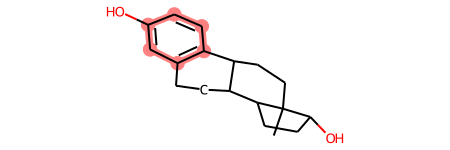

In [5]:
pharmacophore.receptor.ligand

We can visualize the different frames of the trajectory

In [6]:
frame = 0
view = pharmacophore.show(frame=frame, ligand=True, receptor=True)
view

NGLWidget(max_frame=2)

In [9]:
mol = pharmacophore.receptor._mol_graph
mol.GetNumAtoms()

9796

In [10]:
topology = pharmacophore.receptor.topology
topology.n_atoms

27425

In [12]:
hyd_indices = [a.index for a in topology.atoms if a.element.symbol == "H"]
non_hyd_indices = [a.index for a in topology.atoms if a.element.symbol != "H"]

n_non_hyd = topology.n_atoms - len(hyd_indices)
print(f"{n_non_hyd} non hydrogen atoms")

9796 non hydrogen atoms


In [17]:
print(mol.GetAtomWithIdx(1).GetSymbol())
print(topology.atom(1).element.symbol)

C
H
